In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

In [10]:
df = pd.read_csv("./data/data_to_be_cleaned.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    50 non-null     object 
 1   sales   41 non-null     float64
dtypes: float64(1), object(1)
memory usage: 932.0+ bytes


In [11]:


# Convert our date column
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df

,date,sales
0,2024-01-01,0.00
1,2024-01-02,0.01
2,2024-01-03,0.07
3,2024-01-04,0.77
4,2024-01-05,1.48
5,2024-01-06,2.08
6,2024-01-07,1.53
7,2024-01-08,3.48
8,2024-01-09,4.17
9,2024-01-10,5.96


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    50 non-null     datetime64[ns]
 1   sales   41 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 932.0 bytes


In [13]:
# Specific dates we are missing data
na_dates = df[df["sales"].isna()]["date"].values

na_dates

array(['2024-01-16T00:00:00.000000000', '2024-01-25T00:00:00.000000000',
       '2024-01-29T00:00:00.000000000', '2024-02-05T00:00:00.000000000',
       '2024-02-06T00:00:00.000000000', '2024-02-07T00:00:00.000000000',
       '2024-02-08T00:00:00.000000000', '2024-02-09T00:00:00.000000000',
       '2024-02-10T00:00:00.000000000'], dtype='datetime64[ns]')

In [16]:
# How do we go about filling these missing values?

# Options.
# 1. Looking at the data around our missing values, and use that to fill in our data (interpolation) - (linear interpolation)


df["linear_interp"] = df["sales"].interpolate(method="linear")


# What if data shape is more complex? We can extend linear interpol to polynomial interp.
df["quadratic_interp"] = df["sales"].interpolate(method="quadratic")


# We can also use cubic spline interp
df["cubic_spline_interp"] = df["sales"].interpolate(method="cubicspline")

df

,date,sales,linear_interp,quadratic_interp,cubic_spline_interp
0,2024-01-01,0.00,0.00,0.00,0.00
1,2024-01-02,0.01,0.01,0.01,0.01
2,2024-01-03,0.07,0.07,0.07,0.07
3,2024-01-04,0.77,0.77,0.77,0.77
4,2024-01-05,1.48,1.48,1.48,1.48
5,2024-01-06,2.08,2.08,2.08,2.08
6,2024-01-07,1.53,1.53,1.53,1.53
7,2024-01-08,3.48,3.48,3.48,3.48
8,2024-01-09,4.17,4.17,4.17,4.17
9,2024-01-10,5.96,5.96,5.96,5.96


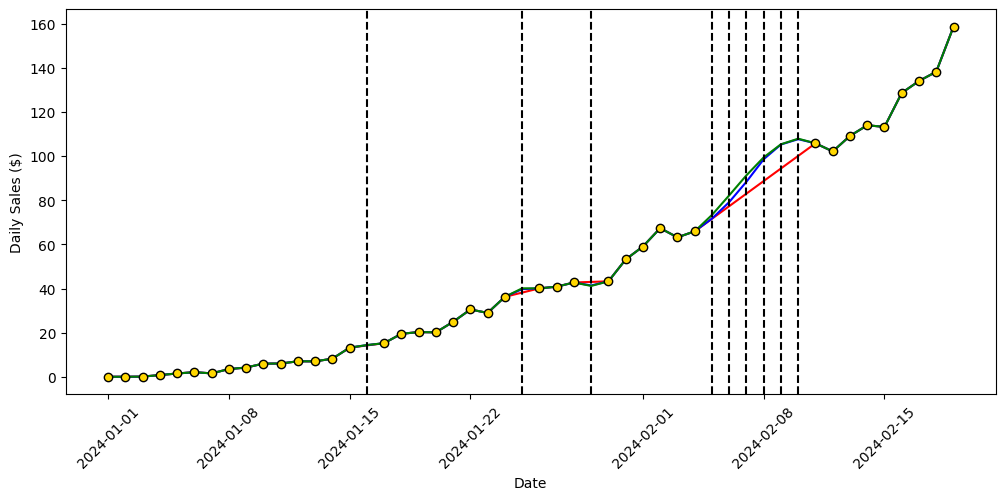

In [17]:


# We can plot this to see how the missing data affects us and to see where we are missing data

plt.figure(figsize = (12,5))

plt.plot(df["date"], df["linear_interp"], "-", label="linear", color="red")
plt.plot(df["date"], df["quadratic_interp"], "-", label="quadratic", color="blue")
plt.plot(df["date"], df["cubic_spline_interp"], "-", label="cubicspline", color="green")
plt.plot(df["date"], df["sales"], "o", label='sales', color="gold", markeredgewidth=1, markeredgecolor='black')

for date_value in na_dates:
    plt.axvline(date_value, linestyle="dashed", color="black")

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Daily Sales ($)")

plt.show()

In [21]:
# Which method is best for our data?

#Error Estimation

# Create new df called errors

errors_df = df[["date", "sales"]].copy()

# Introduce some missing values in a new column called dummy sales
errors_df["dummy_sales"] = errors_df["sales"]

# Exclude some of the sales data. .loc filters the data on specific values
# For every 5th value, set dummy sales to a null value
# Start at position 1 as opposed to position 0 because there is no data before the 0 value
errors_df.loc[(errors_df.index + 1) % 5 == 0, "dummy_sales"] = np.nan
errors_df

,date,sales,dummy_sales
0,2024-01-01,0.00,0.00
1,2024-01-02,0.01,0.01
2,2024-01-03,0.07,0.07
3,2024-01-04,0.77,0.77
4,2024-01-05,1.48,NaN
5,2024-01-06,2.08,2.08
6,2024-01-07,1.53,1.53
7,2024-01-08,3.48,3.48
8,2024-01-09,4.17,4.17
9,2024-01-10,5.96,NaN


In [22]:
# Interpolate on our dummy data using the different methods

# We'll use this to see which is closer to the actual value
errors_df.loc[:, "linear_interp"] = errors_df["dummy_sales"].interpolate(method="linear")
errors_df.loc[:, "quad_interp"] = errors_df["dummy_sales"].interpolate(method="quadratic")
errors_df.loc[:, "spline_interp"] = errors_df["dummy_sales"].interpolate(method="cubicspline")

errors_df

,date,sales,dummy_sales,linear_interp,quad_interp,spline_interp
0,2024-01-01,0.00,0.00,0.00,0.00,0.00
1,2024-01-02,0.01,0.01,0.01,0.01,0.01
2,2024-01-03,0.07,0.07,0.07,0.07,0.07
3,2024-01-04,0.77,0.77,0.77,0.77,0.77
4,2024-01-05,1.48,NaN,1.43,1.76,1.85
5,2024-01-06,2.08,2.08,2.08,2.08,2.08
6,2024-01-07,1.53,1.53,1.53,1.53,1.53
7,2024-01-08,3.48,3.48,3.48,3.48,3.48
8,2024-01-09,4.17,4.17,4.17,4.17,4.17
9,2024-01-10,5.96,NaN,5.09,4.94,4.85


In [24]:
# Determine the difference between the actual value and the interpolated values
errors_df["linear_error"] = np.abs(errors_df["linear_interp"] - errors_df["sales"])
errors_df["quad_error"] = np.abs(errors_df["quad_interp"] - errors_df["sales"])
errors_df["spline_error"] = np.abs(errors_df["spline_interp"] - errors_df["sales"])

# Add filter to exclude the actual missing values from sales and the values we didn't dummify
errors_df[(~errors_df["sales"].isna()) & (errors_df["dummy_sales"].isna())]



,date,sales,dummy_sales,linear_interp,quad_interp,spline_interp,linear_error,quad_error,spline_error
4,2024-01-05,1.48,NaN,1.43,1.76,1.85,0.05,0.29,0.37
9,2024-01-10,5.96,NaN,5.09,4.94,4.85,0.87,1.02,1.10
14,2024-01-15,13.18,NaN,10.54,9.80,9.70,2.65,3.38,3.48
19,2024-01-20,20.13,NaN,22.58,21.30,20.95,2.45,1.17,0.83
29,2024-01-30,43.26,NaN,49.69,48.86,49.12,6.44,5.61,5.86
34,2024-02-04,65.92,NaN,68.53,61.03,61.45,2.61,4.90,4.47
44,2024-02-14,114.00,NaN,111.22,109.71,109.71,2.78,4.29,4.29
49,2024-02-19,158.66,NaN,138.27,NaN,160.22,20.39,NaN,1.56


In [25]:
# We are intereseted in the average error we introduced and the std deviation of those errors

actual_errors_df = errors_df[(~errors_df["sales"].isna()) & (errors_df["dummy_sales"].isna())].copy()

# average error calculation
actual_errors_df[["linear_error", "quad_error", "spline_error"]].mean()

linear_error                   4.78
quad_error                     2.95
spline_error                   2.75
dtype: float64

In [26]:
# standard deviation error calculation
actual_errors_df[["linear_error", "quad_error", "spline_error"]].std()

linear_error                   6.58
quad_error                     2.11
spline_error                   2.04
dtype: float64

In [ ]:
# Spline is the best